In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from openpyxl import Workbook

In [202]:
PG = pd.read_excel('./Тестовое data.xlsx', sheet_name = 'Player_Groups') #reading the xlsx file
PG = PG.T
PG = PG.drop(labels = 'player', axis = 0)

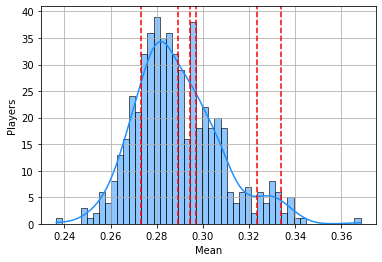

In [200]:
Average = [] #averaging all statisctics of eah player
for i in range(547):
    a = np.mean(PG[i])
    Average.append(a)
Average = np.array(Average)
pl = sns.histplot(Average, color="dodgerblue", kde=True, bins = 50) #plotting the distribution
pl.set_ylabel('Players')
pl.set_xlabel('Mean')
coordinates = np.histogram_bin_edges(Average, bins=50)
plt.axvline(coordinates[33],color='r',linestyle='--')
plt.axvline(coordinates[37], color='r',linestyle='--')
plt.axvline(coordinates[22],color='r',linestyle='--')
plt.axvline(coordinates[23],color='r', linestyle='--')
plt.axvline(coordinates[14],color='r',linestyle='--')
plt.axvline(coordinates[20],color='r', linestyle='--')
plt.grid()
type1 = []
for i in range(len(Average)): #active players
    if (Average[i]>= coordinates[33] and Average[i]<=coordinates[37]):
        type1.append(i)
type0 = []
for i in range(len(Average)): #upper-middle players
    if (Average[i]>= coordinates[22] and Average[i] <= coordinates[23]):
        type0.append(i)
type5 = []
for i in range(len(Average)): #other
    if (Average[i]>= coordinates[14] and Average[i] <= coordinates[20]):
        type5.append(i)


#kde = stats.gaussian_kde(Average)
#x = np.linspace(Average.min(), Average.max())
#y = kde(x)

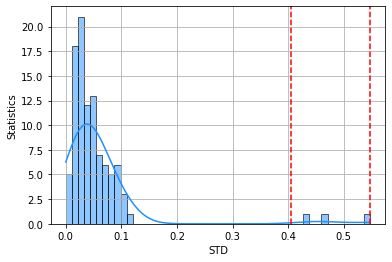

In [203]:
PG = pd.read_excel('./Тестовое data.xlsx', sheet_name = 'Player_Groups') #getting standart deviation for each statistics
STD = PG.std()
STD = [x for x in STD if pd.isnull(x) == False] #excluding nan values
pl = sns.histplot(STD, color="dodgerblue", kde=True, bins = 50)
pl.set_ylabel('Statistics')
pl.set_xlabel('STD')
coordinates = np.histogram_bin_edges(STD, bins=50)
plt.axvline(coordinates[37],color='r',linestyle='--')
plt.axvline(coordinates[50],color='r', linestyle='--')
plt.grid()
std = []
STD = PG.std()
for i in range(len(STD)): #stats 53,54,92 have the biggest STD value it means that players have really different perfomance, probably there are groups
    if (STD[i]>= coordinates[37]):
        std.append(i)

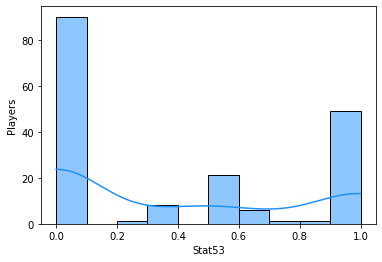

In [133]:
pl = sns.histplot(PG['stat53'], color="dodgerblue", kde=True, bins = 10)
pl.set_ylabel('Players')
pl.set_xlabel('Stat53')

type2 = []
for i in range(len(PG['stat53'])):
    if (PG['stat53'][i] > 0):
        type2.append(i)

[18, 35, 269, 280, 290, 321, 330, 350, 446]


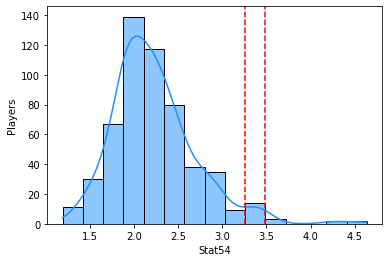

In [134]:
pl = sns.histplot(PG['stat54'], color="dodgerblue", kde=True, bins = 15)
pl.set_ylabel('Players')
pl.set_xlabel('Stat54')
coordinates = np.histogram_bin_edges(PG['stat54'], bins=15)
plt.axvline(coordinates[9],color='r',linestyle='--')
plt.axvline(coordinates[10],color='r', linestyle='--')
type3 = []
for i in range(len(PG['stat54'])):
    if (PG['stat54'][i] >= coordinates[8] and PG['stat53'][i] <= coordinates[11]):
        type3.append(i)
print(type3)

[119, 144, 307, 366, 426]


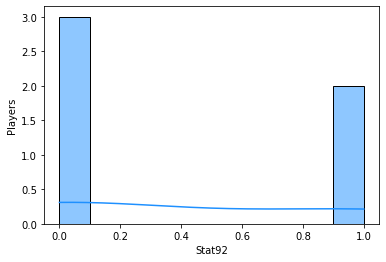

In [135]:
pl = sns.histplot(PG['stat92'], color="dodgerblue", kde=True, bins = 10)
pl.set_ylabel('Players')
pl.set_xlabel('Stat92')
type4 = []
for i in range(len(PG['stat92'])):
    if (pd.isnull(PG['stat92'][i]) == False):
        type4.append(i)
        
print(type4)

In [201]:
excel_file = Workbook() #putting all the groups in a table
excel_sheet = excel_file.create_sheet(title='Task2', index=0)
excel_sheet['A1'] = 'groupNum'
excel_sheet['B1'] = 'players'

excel_sheet.cell(row=2, column=2, value=str(type0))
excel_sheet.cell(row=3, column=2, value=str(type1))
excel_sheet.cell(row=4, column=2, value=str(type2))
excel_sheet.cell(row=5, column=2, value=str(type3))
excel_sheet.cell(row=6, column=2, value=str(type4))
excel_sheet.cell(row=7, column=2, value=str(type5))
for i in range(1,7):
    excel_sheet.cell(row=i+1, column=1).value = i
excel_file.save('Task2.xlsx')
